In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from IPython.display import display, HTML


### REDUCE MEMORY FILE and CLEAN DATA
search_file="D:/programmation/testTechnique/search/searches.csv"
search_file_clean="D:/programmation/testTechnique/search/searches_clean.csv"

# Open search file
source = open(search_file, "r")

# Create a nex file
destination = open(search_file_clean, "w")

#clean and reduce file size
for line in source:
    split_line=line.split('^')
    if len(split_line)>6:
        concat_line=split_line[0]+"^"+split_line[6]+"\n"
        destination.write(concat_line)
    else:
        #Clean broken data
        split_line=line.split(',')
        if len(split_line)>7:
            concat_line=split_line[0]+"^"+split_line[6]+"\n"
            destination.write(concat_line)

#close file
source.close()
destination.close()




In [11]:

searches = pd.read_csv(search_file_clean,skipinitialspace=True,sep='^')

#clean column name
searches.columns = searches.columns.str.strip()

#filter searches by Destination BCN, MAD and AGP
searches=searches[(searches.Destination=='BCN') | (searches.Destination=='MAD') | (searches.Destination=='AGP')]

#Format date and add column 
list_years = [item[:7] for item in searches['Date']]

list_date = [item[:7].replace('-','') for item in searches['Date']]

searches['Date']=list_date

searches['nb_searches']=list_years

#group by Date and Destination
grp_searches=searches.groupby(['Date','Destination'],as_index=False).aggregate({'nb_searches' :'count'})

destination=grp_searches['Destination'].unique()

display(grp_searches.head())




Date Destination  nb_searches
0  201301         AGP         9633
1  201301         BCN        29469
2  201301         MAD        24258
3  201302         AGP         8379
4  201302         BCN        28329

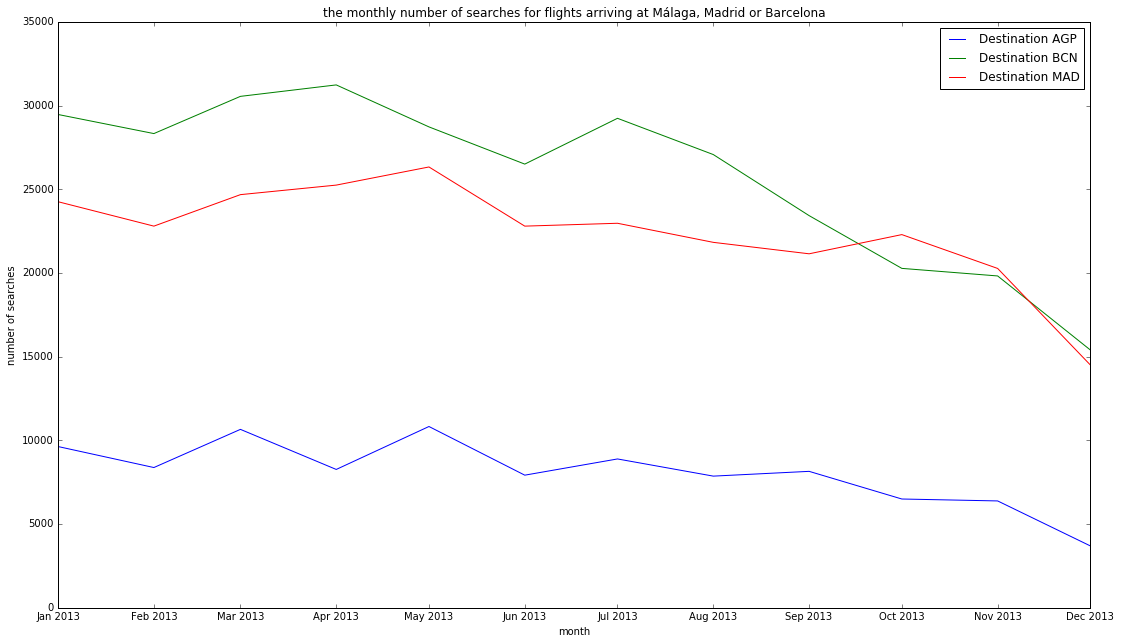

In [13]:

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
#Construct the graph by with subgraph
for dest in destination:
    filtered_row_by_dest = grp_searches[grp_searches['Destination']==dest]
    dates = filtered_row_by_dest['Date']
    dates_f = [dt.datetime.strptime(date,'%Y%m') for date in dates]
    label_dest = "Destination {0}".format(dest)
    ax.plot(dates_f, filtered_row_by_dest['nb_searches'], label=label_dest)

ax.legend()
plt.ylabel('number of searches')
plt.xlabel('month')
plt.title('the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona')
